In [2]:
# import required packages 
using DataFrames
using FreqTables
using Plots, StatPlots
using DecisionTree
using StatsModels
using MLDataUtils

#Set the backend as matplotlib.pyplot
pyplot()

Plots.PyPlotBackend()

Base.Nullable{S}, Base.Nullable{T}) in module Base at nullable.jl:238 overwritten in module NullableArrays at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\NullableArrays\src\operators.jl:99.


In [3]:
# Read Dataset
data = readtable("C:/Users/veer/Desktop/Projects/Julia_In_Banking/Data/loan_data.csv")

,loan_id,member_id,home_ownership,annual_inc,loan_status,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job
1,57245,138150,OWN,54000.0,Fully Paid,1200.0,36 months,0.1311,679,0,36,5,married,freelance
2,61390,182594,MORTGAGE,148000.0,Fully Paid,4000.0,36 months,0.0788,729,0,25,8,single,partime
3,61419,182917,RENT,45000.0,Charged Off,5600.0,36 months,0.1496,669,0,22,2,married,fixed
4,62102,191024,RENT,54000.0,Fully Paid,3200.0,36 months,0.0988,744,0,25,4,married,fixed
5,66943,247802,RENT,24000.0,Fully Paid,2800.0,60 months,0.1149,709,0,26,17,married,fixed
6,68163,258249,MORTGAGE,100000.0,Fully Paid,3000.0,36 months,0.0714,749,0,22,8,married,freelance
7,69990,275254,RENT,125000.0,Fully Paid,15500.0,36 months,0.0788,784,1,29,3,single,freelance
8,290807,290804,RENT,84996.0,Fully Paid,15000.0,36 months,0.157,674,1,29,13,separated,freelance
9,347648,348254,RENT,60000.0,Fully Paid,10000.0,36 months,0.1273,714,0,22,15,single,fixed
10,348340,349269,RENT,71000.0,Fully Paid,8000.0,36 months,0.1112,714,0,26,5,married,fixed


In [4]:
# Create 02 categories for loan status
data[:loan_status_new] = ifelse.(data[:loan_status] .== "Fully Paid",0,1)
delete!(data,:loan_status)

,loan_id,member_id,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status_new
1,57245,138150,OWN,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0
2,61390,182594,MORTGAGE,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0
3,61419,182917,RENT,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1
4,62102,191024,RENT,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0
5,66943,247802,RENT,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0
6,68163,258249,MORTGAGE,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0
7,69990,275254,RENT,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0
8,290807,290804,RENT,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0
9,347648,348254,RENT,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0
10,348340,349269,RENT,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0


In [5]:
rename!(data, :loan_status_new, :loan_status)

,loan_id,member_id,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status
1,57245,138150,OWN,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0
2,61390,182594,MORTGAGE,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0
3,61419,182917,RENT,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1
4,62102,191024,RENT,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0
5,66943,247802,RENT,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0
6,68163,258249,MORTGAGE,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0
7,69990,275254,RENT,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0
8,290807,290804,RENT,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0
9,347648,348254,RENT,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0
10,348340,349269,RENT,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0


In [6]:
# Delete Loan ID and Customer ID columns
delete!(data,:loan_id)
delete!(data,:member_id)

,home_ownership,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status
1,OWN,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0
2,MORTGAGE,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0
3,RENT,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1
4,RENT,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0
5,RENT,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0
6,MORTGAGE,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0
7,RENT,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0
8,RENT,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0
9,RENT,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0
10,RENT,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0


In [7]:
# Explore Loan Amount
freqtable(data[:loan_status])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼─────
0     │ 9113
1     │ 1429

In [8]:
describe(data[:annual_inc])

Summary Stats:
Mean:           68835.898406
Minimum:        4080.000000
1st Quartile:   40000.000000
Median:         57600.000000
3rd Quartile:   81000.000000
Maximum:        6000000.000000
Length:         10542
Type:           Float64
Number Missing: 0
% Missing:      0.000000


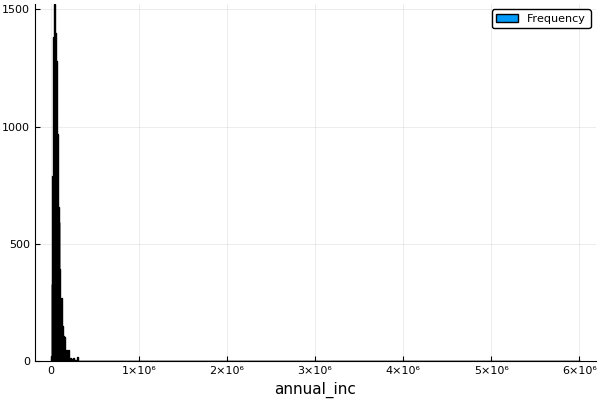

In [9]:
# Plot Histogram for Applicant Income
Plots.histogram(data[:annual_inc], bins = 1000, xlabel = "annual_inc", labels = "Frequency")

In [12]:
eltypes(data)

12-element Array{Type,1}:
 String 
 Float64
 Float64
 String 
 Float64
 Int64  
 Int64  
 Int64  
 Int64  
 String 
 String 
 Int64  

In [13]:
freqtable(data[:home_ownership])

3-element Named Array{Int64,1}
Dim1     │ 
─────────┼─────
MORTGAGE │ 4540
OWN      │  883
RENT     │ 5119

In [14]:
# Label Encoding-- Home Ownership
data[:Rent] = ifelse.(data[:home_ownership] .== "RENT",1,0)
data[:Mortgage] = ifelse.(data[:home_ownership] .== "MORTGAGE",1,0) # Zero values for both the home ownership type show OWN type
delete!(data,:home_ownership)

,annual_inc,loan_amnt,term,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status,Rent,Mortgage
1,54000.0,1200.0,36 months,0.1311,679,0,36,5,married,freelance,0,0,0
2,148000.0,4000.0,36 months,0.0788,729,0,25,8,single,partime,0,0,1
3,45000.0,5600.0,36 months,0.1496,669,0,22,2,married,fixed,1,1,0
4,54000.0,3200.0,36 months,0.0988,744,0,25,4,married,fixed,0,1,0
5,24000.0,2800.0,60 months,0.1149,709,0,26,17,married,fixed,0,1,0
6,100000.0,3000.0,36 months,0.0714,749,0,22,8,married,freelance,0,0,1
7,125000.0,15500.0,36 months,0.0788,784,1,29,3,single,freelance,0,1,0
8,84996.0,15000.0,36 months,0.157,674,1,29,13,separated,freelance,0,1,0
9,60000.0,10000.0,36 months,0.1273,714,0,22,15,single,fixed,0,1,0
10,71000.0,8000.0,36 months,0.1112,714,0,26,5,married,fixed,0,1,0


In [15]:
# Label Encoding-- term
data[:_36_months] = ifelse.(data[:term] .== "36 months",1,0)
delete!(data,:term)

,annual_inc,loan_amnt,int_rate,cibil_score,inq_last_6mths,age,emp_length,marital,job,loan_status,Rent,Mortgage,_36_months
1,54000.0,1200.0,0.1311,679,0,36,5,married,freelance,0,0,0,1
2,148000.0,4000.0,0.0788,729,0,25,8,single,partime,0,0,1,1
3,45000.0,5600.0,0.1496,669,0,22,2,married,fixed,1,1,0,1
4,54000.0,3200.0,0.0988,744,0,25,4,married,fixed,0,1,0,1
5,24000.0,2800.0,0.1149,709,0,26,17,married,fixed,0,1,0,0
6,100000.0,3000.0,0.0714,749,0,22,8,married,freelance,0,0,1,1
7,125000.0,15500.0,0.0788,784,1,29,3,single,freelance,0,1,0,1
8,84996.0,15000.0,0.157,674,1,29,13,separated,freelance,0,1,0,1
9,60000.0,10000.0,0.1273,714,0,22,15,single,fixed,0,1,0,1
10,71000.0,8000.0,0.1112,714,0,26,5,married,fixed,0,1,0,1


In [16]:
# Label Encoding-- marital
data[:married] = ifelse.(data[:marital] .== "married",1,0)
data[:single] = ifelse.(data[:marital] .== "single",1,0)
delete!(data,:marital)

,annual_inc,loan_amnt,int_rate,cibil_score,inq_last_6mths,age,emp_length,job,loan_status,Rent,Mortgage,_36_months,married,single
1,54000.0,1200.0,0.1311,679,0,36,5,freelance,0,0,0,1,1,0
2,148000.0,4000.0,0.0788,729,0,25,8,partime,0,0,1,1,0,1
3,45000.0,5600.0,0.1496,669,0,22,2,fixed,1,1,0,1,1,0
4,54000.0,3200.0,0.0988,744,0,25,4,fixed,0,1,0,1,1,0
5,24000.0,2800.0,0.1149,709,0,26,17,fixed,0,1,0,0,1,0
6,100000.0,3000.0,0.0714,749,0,22,8,freelance,0,0,1,1,1,0
7,125000.0,15500.0,0.0788,784,1,29,3,freelance,0,1,0,1,0,1
8,84996.0,15000.0,0.157,674,1,29,13,freelance,0,1,0,1,0,0
9,60000.0,10000.0,0.1273,714,0,22,15,fixed,0,1,0,1,0,1
10,71000.0,8000.0,0.1112,714,0,26,5,fixed,0,1,0,1,1,0


In [17]:
# Label Encoding-- marital
data[:job_fixed] = ifelse.(data[:job] .== "fixed",1,0)
data[:job_freelance] = ifelse.(data[:job] .== "freelance",1,0)
data[:job_parttime] = ifelse.(data[:job] .== "partime",1,0)
delete!(data,:job)

,annual_inc,loan_amnt,int_rate,cibil_score,inq_last_6mths,age,emp_length,loan_status,Rent,Mortgage,_36_months,married,single,job_fixed,job_freelance,job_parttime
1,54000.0,1200.0,0.1311,679,0,36,5,0,0,0,1,1,0,0,1,0
2,148000.0,4000.0,0.0788,729,0,25,8,0,0,1,1,0,1,0,0,1
3,45000.0,5600.0,0.1496,669,0,22,2,1,1,0,1,1,0,1,0,0
4,54000.0,3200.0,0.0988,744,0,25,4,0,1,0,1,1,0,1,0,0
5,24000.0,2800.0,0.1149,709,0,26,17,0,1,0,0,1,0,1,0,0
6,100000.0,3000.0,0.0714,749,0,22,8,0,0,1,1,1,0,0,1,0
7,125000.0,15500.0,0.0788,784,1,29,3,0,1,0,1,0,1,0,1,0
8,84996.0,15000.0,0.157,674,1,29,13,0,1,0,1,0,0,0,1,0
9,60000.0,10000.0,0.1273,714,0,22,15,0,1,0,1,0,1,1,0,0
10,71000.0,8000.0,0.1112,714,0,26,5,0,1,0,1,1,0,1,0,0


In [18]:
# Partition Data into Train and Test datasets
function partitionTrainTest(data, at = 0.7)
    n = nrow(data)
    idx = shuffle(1:n)
    train_idx = view(idx, 1:floor(Int, at*n))
    test_idx = view(idx, (floor(Int, at*n)+1):n)
    data[train_idx,:], data[test_idx,:]
end

train,test = partitionTrainTest(data, 0.7) # 70% train

(7379×16 DataFrames.DataFrame
│ Row  │ annual_inc │ loan_amnt │ int_rate │ cibil_score │ inq_last_6mths │
├──────┼────────────┼───────────┼──────────┼─────────────┼────────────────┤
│ 1    │ 12000.0    │ 2200.0    │ 0.1323   │ 679         │ 0              │
│ 2    │ 58000.0    │ 3625.0    │ 0.0617   │ 754         │ 0              │
│ 3    │ 63000.0    │ 4500.0    │ 0.0888   │ 714         │ 2              │
│ 4    │ 65000.0    │ 6000.0    │ 0.0788   │ 784         │ 0              │
│ 5    │ 54996.0    │ 4200.0    │ 0.1595   │ 664         │ 1              │
│ 6    │ 150000.0   │ 24000.0   │ 0.1183   │ 814         │ 0              │
│ 7    │ 66924.0    │ 5000.0    │ 0.1186   │ 719         │ 0              │
│ 8    │ 74000.0    │ 25000.0   │ 0.1719   │ 684         │ 3              │
│ 9    │ 33600.0    │ 4000.0    │ 0.0639   │ 784         │ 1              │
│ 10   │ 60000.0    │ 12000.0   │ 0.1682   │ 669         │ 0              │
│ 11   │ 55000.0    │ 19200.0   │ 0.1521   │ 699         │

In [19]:
# Missing value imputation- train dataset
# Replace missing loan amount with median of loan amount
showcols(train)
train[isna.(train[:emp_length]),:emp_length] = floor(median(dropna(train[:emp_length])))

7379×16 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ annual_inc     │ Float64 │ 0       │
│ 2     │ loan_amnt      │ Float64 │ 0       │
│ 3     │ int_rate       │ Float64 │ 0       │
│ 4     │ cibil_score    │ Int64   │ 0       │
│ 5     │ inq_last_6mths │ Int64   │ 0       │
│ 6     │ age            │ Int64   │ 0       │
│ 7     │ emp_length     │ Int64   │ 118     │
│ 8     │ loan_status    │ Int64   │ 0       │
│ 9     │ Rent           │ Int64   │ 0       │
│ 10    │ Mortgage       │ Int64   │ 0       │
│ 11    │ _36_months     │ Int64   │ 0       │
│ 12    │ married        │ Int64   │ 0       │
│ 13    │ single         │ Int64   │ 0       │
│ 14    │ job_fixed      │ Int64   │ 0       │
│ 15    │ job_freelance  │ Int64   │ 0       │
│ 16    │ job_parttime   │ Int64   │ 0       │

5.0

In [20]:
# Missing value imputation-- test dataset
# Replace missing loan amount with median of loan amount
showcols(test)
test[isna.(test[:emp_length]),:emp_length] = floor(median(dropna(test[:emp_length])))

3163×16 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ annual_inc     │ Float64 │ 0       │
│ 2     │ loan_amnt      │ Float64 │ 0       │
│ 3     │ int_rate       │ Float64 │ 0       │
│ 4     │ cibil_score    │ Int64   │ 0       │
│ 5     │ inq_last_6mths │ Int64   │ 0       │
│ 6     │ age            │ Int64   │ 0       │
│ 7     │ emp_length     │ Int64   │ 43      │
│ 8     │ loan_status    │ Int64   │ 0       │
│ 9     │ Rent           │ Int64   │ 0       │
│ 10    │ Mortgage       │ Int64   │ 0       │
│ 11    │ _36_months     │ Int64   │ 0       │
│ 12    │ married        │ Int64   │ 0       │
│ 13    │ single         │ Int64   │ 0       │
│ 14    │ job_fixed      │ Int64   │ 0       │
│ 15    │ job_freelance  │ Int64   │ 0       │
│ 16    │ job_parttime   │ Int64   │ 0       │

4.0

In [21]:
showcols(train)

7379×16 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ annual_inc     │ Float64 │ 0       │
│ 2     │ loan_amnt      │ Float64 │ 0       │
│ 3     │ int_rate       │ Float64 │ 0       │
│ 4     │ cibil_score    │ Int64   │ 0       │
│ 5     │ inq_last_6mths │ Int64   │ 0       │
│ 6     │ age            │ Int64   │ 0       │
│ 7     │ emp_length     │ Int64   │ 0       │
│ 8     │ loan_status    │ Int64   │ 0       │
│ 9     │ Rent           │ Int64   │ 0       │
│ 10    │ Mortgage       │ Int64   │ 0       │
│ 11    │ _36_months     │ Int64   │ 0       │
│ 12    │ married        │ Int64   │ 0       │
│ 13    │ single         │ Int64   │ 0       │
│ 14    │ job_fixed      │ Int64   │ 0       │
│ 15    │ job_freelance  │ Int64   │ 0       │
│ 16    │ job_parttime   │ Int64   │ 0       │

In [22]:
showcols(test)

3163×16 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ annual_inc     │ Float64 │ 0       │
│ 2     │ loan_amnt      │ Float64 │ 0       │
│ 3     │ int_rate       │ Float64 │ 0       │
│ 4     │ cibil_score    │ Int64   │ 0       │
│ 5     │ inq_last_6mths │ Int64   │ 0       │
│ 6     │ age            │ Int64   │ 0       │
│ 7     │ emp_length     │ Int64   │ 0       │
│ 8     │ loan_status    │ Int64   │ 0       │
│ 9     │ Rent           │ Int64   │ 0       │
│ 10    │ Mortgage       │ Int64   │ 0       │
│ 11    │ _36_months     │ Int64   │ 0       │
│ 12    │ married        │ Int64   │ 0       │
│ 13    │ single         │ Int64   │ 0       │
│ 14    │ job_fixed      │ Int64   │ 0       │
│ 15    │ job_freelance  │ Int64   │ 0       │
│ 16    │ job_parttime   │ Int64   │ 0       │

In [23]:
y_train = train[:,:loan_status]
X_train = train[:,[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16]]
y_test = test[:,:loan_status]
X_test = test[:,[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16]]

,annual_inc,loan_amnt,int_rate,cibil_score,inq_last_6mths,age,emp_length,Rent,Mortgage,_36_months,married,single,job_fixed,job_freelance,job_parttime
1,48000.0,11000.0,0.1361,709,0,22,7,1,0,0,0,1,1,0,0
2,87700.0,25000.0,0.1025,774,0,31,1,0,1,1,1,0,0,0,1
3,110000.0,25000.0,0.209,674,2,25,4,1,0,0,1,0,1,0,0
4,21000.0,4200.0,0.0542,789,0,29,17,1,0,1,1,0,0,1,0
5,44300.0,6000.0,0.1099,729,1,33,1,0,1,1,1,0,1,0,0
6,65000.0,6000.0,0.1756,674,1,25,9,1,0,0,1,0,1,0,0
7,55000.0,16750.0,0.1793,669,0,33,2,1,0,0,1,0,1,0,0
8,30000.0,2000.0,0.1422,684,3,23,13,1,0,1,0,0,1,0,0
9,130000.0,24000.0,0.1149,719,1,25,17,1,0,1,1,0,0,0,1
10,150000.0,21000.0,0.1183,759,1,40,2,0,0,1,1,0,1,0,0


In [24]:
# Undersampling the training dataset
X_train, y_train = undersample((X_train, y_train), shuffle = true)

(1968×15 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row  │ annual_inc │ loan_amnt │ int_rate │ cibil_score │ inq_last_6mths │
├──────┼────────────┼───────────┼──────────┼─────────────┼────────────────┤
│ 1    │ 120000.0   │ 10000.0   │ 0.1099   │ 724         │ 3              │
│ 2    │ 68000.0    │ 25000.0   │ 0.1558   │ 789         │ 4              │
│ 3    │ 38400.0    │ 6000.0    │ 0.0751   │ 764         │ 1              │
│ 4    │ 34656.0    │ 5500.0    │ 0.0751   │ 744         │ 1              │
│ 5    │ 22000.0    │ 4000.0    │ 0.1136   │ 719         │ 0              │
│ 6    │ 33000.0    │ 10800.0   │ 0.1223   │ 684         │ 0              │
│ 7    │ 55200.0    │ 7500.0    │ 0.1632   │ 669         │ 0              │
│ 8    │ 70000.0    │ 6425.0    │ 0.1372   │ 664         │ 1              │
│ 9    │ 38000.0    │ 5200.0    │ 0.0788   │ 729         │ 3              │
│ 10   │ 48000.0    │ 5000.0    │ 0.0999   │ 779         │ 1              │
│ 11   │ 39000.0    │ 3250.0    │ 0.071

In [25]:
# Convert all the datasets in to arrays
# Convert data types for all the columns in training dataset to float type
for c = eachcol(X_train)
  if eltype(c[2]) <: Integer
    X_train[c[1]] = X_train[c[1]] .* 1.0
  end
end

for c = eachcol(X_test)
  if eltype(c[2]) <: Integer
    X_test[c[1]] = X_test[c[1]] .* 1.0
  end
end

X_train1 = convert(Array, X_train)
X_test1 = convert(Array, X_test)
y_train1 = convert(Array, y_train)
y_test1 = convert(Array, y_test)

3163-element Array{Int64,1}:
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [35]:
# Build a standard scaler
type StandardScalar
    mean::Vector{Float64}
    std::Vector{Float64}
end

# Helper function to initialize an empty scalar
function StandardScalar()
    StandardScalar(Array(Real,0),Array(Real,0))
end

# Compute mean and standard deviation of each column
function fit_std_scalar!(std_scalar::StandardScalar,X::Matrix{Real})
    n_rows, n_cols = size(X)
    std_scalar.std = zeros(n_cols)
    std_scalar.mean = zeros(n_cols)
    # for loops are fast again!
    for i = 1:n_cols
        std_scalar.mean[i] = mean(X[:,i])
        std_scalar.std[i] = std(X[:,i])
    end
end

function transform(std_scalar::StandardScalar,X::Matrix{Real})
    (X .- std_scalar.mean') ./ std_scalar.std' # broadcasting
end

# fit and transform in one function
function fit_transform!(std_scalar::StandardScalar,X::Matrix{Real})
    fit_std_scalar!(std_scalar,X)
    transform(std_scalar,X)
end

fit_transform! (generic function with 2 methods)

In [36]:
# Perform Standard Scaling for all X variables
std_scalar = StandardScalar()

X_train1 = fit_transform!(std_scalar,X_train1)
X_test1 = transform(std_scalar,X_test1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Real}, ::Int64) at .\deprecated.jl:57
 [3] StandardScalar() at .\In[35]:9
 [4] include_string(::String, ::String) at .\loading.jl:522
 [5] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\eventloop.jl:8
 [9] (::IJulia.##14#17)() at .\task.jl:335
while loading In[36], in expression starting on line 2


3163×15 Array{Float64,2}:
 -0.302285    0.0900448   0.393808  …   0.741989  -0.552947  -0.309386
  0.31998     2.1791     -0.584275     -1.34704   -0.552947   3.23057 
  0.669514    2.1791      2.5159        0.741989  -0.552947  -0.309386
 -0.725488   -0.924641   -1.99027      -1.34704    1.80757   -0.309386
 -0.36028    -0.656048   -0.368864      0.741989  -0.552947  -0.309386
 -0.0358243  -0.656048    1.54364   …   0.741989  -0.552947  -0.309386
 -0.192566    0.948051    1.65134       0.741989  -0.552947  -0.309386
 -0.584421   -1.25292     0.571377      0.741989  -0.552947  -0.309386
  0.982998    2.02989    -0.223316     -1.34704   -0.552947   3.23057 
  1.29648     1.58223    -0.124343      0.741989  -0.552947  -0.309386
 -0.584421   -1.14847    -0.438727  …  -1.34704   -0.552947  -0.309386
  0.199351   -0.0591737   0.856651     -1.34704   -0.552947   3.23057 
  0.199351   -0.730657   -0.438727     -1.34704   -0.552947   3.23057 
  ⋮                                 ⋱              

In [37]:
labels= y_train1
features= X_train1

1968×15 Array{Float64,2}:
  0.826256   -0.0591737  -0.368864    …  -1.34704    1.80757   -0.309386
  0.0111983   2.1791      0.967267        0.741989  -0.552947  -0.309386
 -0.452758   -0.656048   -1.38188         0.741989  -0.552947  -0.309386
 -0.511442   -0.730657   -1.38188         0.741989  -0.552947  -0.309386
 -0.709814   -0.954485   -0.261158        0.741989  -0.552947  -0.309386
 -0.537398    0.0602011  -0.00790456  …   0.741989  -0.552947  -0.309386
 -0.189431   -0.43222     1.18268         0.741989  -0.552947  -0.309386
  0.0425467  -0.59263     0.425829        0.741989  -0.552947  -0.309386
 -0.459027   -0.775423   -1.27417        -1.34704    1.80757   -0.309386
 -0.302285   -0.805266   -0.65996         0.741989  -0.552947  -0.309386
 -0.443353   -1.0664     -1.48958     …   0.741989  -0.552947  -0.309386
 -0.114195   -0.0591737   0.501514        0.741989  -0.552947  -0.309386
 -0.114195   -0.0591737   0.210417        0.741989  -0.552947  -0.309386
  ⋮                      

In [42]:
# Apply Artificial Neural Network
using ANN

In [67]:
ann = ArtificialNeuralNetwork(32)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{ANN.NeuralLayer}, ::Int64) at .\deprecated.jl:57
 [3] ANN.ArtificialNeuralNetwork(::Int64) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:60
 [4] include_string(::String, ::String) at .\loading.jl:522
 [5] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\eventloop.jl:8
 [9] (::IJulia.##14#17)() at .\task.jl:335
while loading In[

ANN.ArtificialNeuralNetwork(ANN.NeuralLayer[], [32], Int64[])

In [68]:
using ANN: fit!, predict

In [79]:
fit!(ann,features,labels,epochs=30,alpha=0.1,lambda=1e-5)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{ANN.NeuralLayer}, ::Int64) at .\deprecated.jl:57
 [3] init!(::ANN.ArtificialNeuralNetwork, ::Array{Float64,2}, ::Array{Int64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:80
 [4] #fit!#3(::Int64, ::Float64, ::Float64, ::Function, ::ANN.ArtificialNeuralNetwork, ::Array{Float64,2}, ::Array{Int64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:101
 [5] (::ANN.#kw##fit!)(::Array{Any,1}, ::ANN.#fit!, ::ANN.ArtificialNeuralNetwork, ::Array{Float64,2}, ::Array{Int64,1}) at .\<missing>:0
 [6] include_string(::String, ::String) at .\loading.jl:522
 [7] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [9] (::Compat.#inner#17{Array{Any,1},IJulia.#e

In [80]:
y_proba = predict(ann,X_test1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] exp(::Array{Float64,1}) at .\deprecated.jl:57
 [3] sigm(::Array{Float64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:20
 [4] forward_propagate(::ANN.NeuralLayer, ::Array{Float64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:68
 [5] predict(::ANN.ArtificialNeuralNetwork, ::Array{Float64,1}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:136
 [6] predict(::ANN.ArtificialNeuralNetwork, ::Array{Float64,2}) at C:\Users\veer\.julia\v0.6\ANN\src\base.jl:146
 [7] include_string(::String, ::String) at .\loading.jl:522
 [8] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [10] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Ms

3163×2 Array{Float64,2}:
 0.147154   0.852846 
 0.489305   0.510695 
 0.0873498  0.91265  
 0.861358   0.138642 
 0.451082   0.548918 
 0.196064   0.803936 
 0.216123   0.783877 
 0.593689   0.406311 
 0.257987   0.742013 
 0.635155   0.364845 
 0.281656   0.718344 
 0.584915   0.415085 
 0.645499   0.354501 
 ⋮                   
 0.640461   0.359539 
 0.36604    0.63396  
 0.909966   0.0900343
 0.351965   0.648035 
 0.240493   0.759507 
 0.451406   0.548594 
 0.654663   0.345337 
 0.604988   0.395012 
 0.420069   0.579931 
 0.54352    0.45648  
 0.829357   0.170643 
 0.233809   0.766191 

In [81]:
y_pred = Array(Int64,length(y_test1))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64) at .\deprecated.jl:57
 [3] include_string(::String, ::String) at .\loading.jl:522
 [4] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [6] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:385
 [7] eventloop(::ZMQ.Socket) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\eventloop.jl:8
 [8] (::IJulia.##14#17)() at .\task.jl:335
while loading In[81], in expression starting on line 1


3163-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [82]:
for i in 1:length(y_test1)
    # must translate class index to label
    y_pred[i] = ann.classes[indmax(y_proba[i,:])]
end

In [83]:
println("Prediction accuracy: ",mean(y_pred .== y_test1))

Prediction accuracy: 0.6244072083465064


In [ ]:
# Save Model in R format
using RCall
saveRDS("C:/Users/veer/Desktop/Projects/Credit_Risk_Modeling/inal/JuliaModelLoanPred.rds",ann)